In [1]:
import os
import torch
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader

from TransferLearningModel import TransferLearningModel
from utils import TensorFolderDatasetFinal, TransformDatasetFinal, TensorFolderDatasetFinalFlat, TransformDatasetFinalFlat, TensorFolderDataset, TransformDataset, DicomFineDataset3D

In [2]:
BASE_DIR = "C:/Users/Dominik Hahn/OneDrive/Studium/Master/Masterarbeit/Daten/nodule"
scenario = 1
data_augmentation = True
classes = ["nodule", "non-nodule"]
classes_fine = ["A", "B", "E", "G"]
classes_dict = {value: index for index, value in enumerate(classes_fine)}

In [3]:
checkpoint = torch.load("./weights/final/augmented_3dcnn.pt", weights_only=False)
model = TransferLearningModel(classes, "3dcnn", data_augmentation=data_augmentation, fine=False, scenario=scenario)
model.train_transforms, model.test_transforms = model.get_transforms()
model.model.load_state_dict(checkpoint['model_state_dict'])

<All keys matched successfully>

In [4]:
test_dataset_base = TensorFolderDatasetFinal("./data/final/Merged_3D")
test_dataset = TransformDatasetFinal(test_dataset_base, transform=model.test_transforms)
test_loader = DataLoader(test_dataset, batch_size=2, shuffle=False)

c:\Users\Dominik Hahn\Documents\GitHub\Masterarbeit\Final Models\utils.py:655: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(file_path)


Evaluation Accuracy on unseen data: 94.20289855072464


<Figure size 1000x800 with 0 Axes>

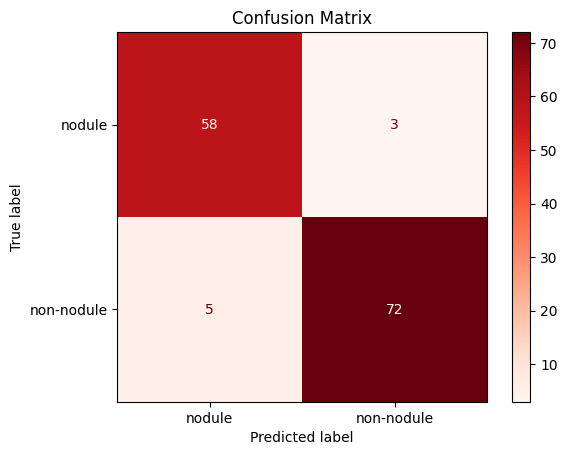

In [5]:
loss = checkpoint["loss"]
# model.evaluate_final(test_loader, save_dir="./data/final/Predicted_Nodules")
model.evaluate_final(test_loader)

In [6]:
predicted_volume = torch.load("./data/final/Predicted_Nodules/tensor_106_label_coarse_0_label_fine_1.pt")
predicted_volume.keys()

C:\Users\Dominik Hahn\AppData\Local\Temp\ipykernel_27892\592043922.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  predicted_volume = torch.load("./data/final/Predicted_

dict_keys(['image', 'label', 'slice_paths', 'label_fine'])

In [7]:
checkpoint_fine = torch.load("./weights/final/efficientnet.pt", weights_only=False)
model_fine = TransferLearningModel(classes_fine, "efficientnet", data_augmentation=False, fine=True)
model_fine.train_transforms, model_fine.test_transforms = model_fine.get_transforms()
model_fine.model.load_state_dict(checkpoint_fine['model_state_dict'])

<All keys matched successfully>

In [ ]:
test_dataset_fine_base = TensorFolderDatasetFinalFlat(tensor_folder_path="./data/final/Predicted_Nodules", dicom_folder_path=BASE_DIR)
test_dataset_fine = TransformDatasetFinalFlat(test_dataset_fine_base, transform=model_fine.test_transforms)
test_loader_fine = DataLoader(test_dataset_fine, batch_size=32, shuffle=False)
model_fine.evaluate(test_loader_fine)

c:\Users\Dominik Hahn\Documents\GitHub\Masterarbeit\Final Models\utils.py:685: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  temp_pt_file = torch.load(os.path.join(tensor_fo